In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start = '20150101'
end = '20240101'

qqq = yf.Ticker('QQQ')
qqq_price = qqq.history(period='max')[start:]



In [ ]:
df = qqq_price
window = 20
no_of_std = 2

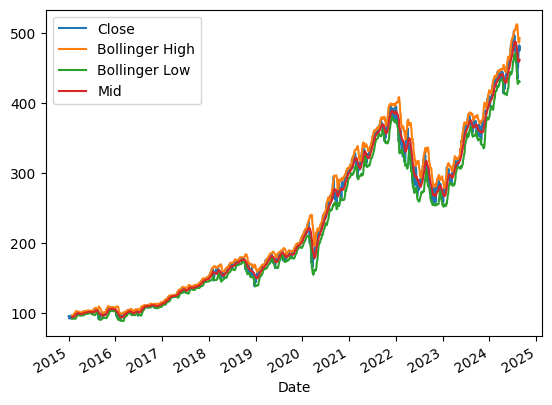

In [ ]:
rolling_mean = df['Close'].rolling(window).mean()
rolling_std = df['Close'].rolling(window).std()
df['Mid'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
df[['Close', 'Bollinger High', 'Bollinger Low','Mid']].plot()
plt.show()

Streaming output truncated to the last 5000 lines.
<ipython-input-23-defc21572323>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[row] = df['Position'].iloc[row - 1]
<ipython-input-23-defc21572323>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[row] = df['Position'].iloc[row - 1]
<ipython-input-23-defc21572323>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[row] = -1 #G

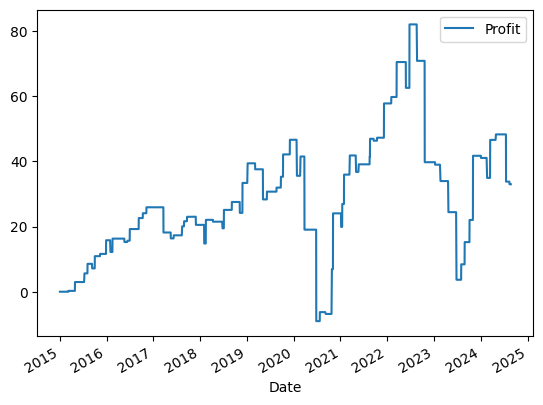

In [23]:
df['Position'] = 0 #0 : No Position, 1: Long, -1: Short
df['Profit'] = 0   # Tracks Profit
df['Entry'] = 0 # Tracks open trade's entry price

for row in range(len(df)): #for every value in df
  df['Profit'].iloc[row] = df['Profit'].iloc[row - 1]
  df['Position'].iloc[row] = df['Position'].iloc[row - 1]
  df['Entry'].iloc[row] = df['Entry'].iloc[row - 1]

  if(df['Position'].iloc[row - 1] == 0):
    if(df['Close'].iloc[row] > df['Bollinger High'].iloc[row]) and (
        df['Close'].iloc[row - 1] < df['Bollinger High'].iloc[row - 1]):
        df['Position'].iloc[row] = -1 #Going short
        df['Entry'].iloc[row] = df['Close'].iloc[row]

    if(df['Close'].iloc[row] < df['Bollinger Low'].iloc[row]) and (
        df['Close'].iloc[row - 1] > df['Bollinger Low'].iloc[row - 1]):
        df['Position'].iloc[row] = 1 #Going long
        df['Entry'].iloc[row] = df['Close'].iloc[row]

        # Existing position found
  else:
    if(df['Position'].iloc[row - 1] == -1):
      if(df['Close'].iloc[row] < df['Mid'].iloc[row]) and(
         df['Close'].iloc[row - 1] > df['Mid'].iloc[row - 1]):
         df['Position'].iloc[row] = 0 #Exit
         df['Profit'].iloc[row] = df['Profit'].iloc[row - 1] + df['Entry'].iloc[row] - df['Close'].iloc[row]
    else: #Long Position
      if(df['Close'].iloc[row] > df['Mid'].iloc[row]) and(
         df['Close'].iloc[row - 1] < df['Mid'].iloc[row - 1]):
         df['Position'].iloc[row] = 0 #Exit
         df['Profit'].iloc[row] = df['Profit'].iloc[row - 1] - df['Entry'].iloc[row] + df['Close'].iloc[row]

df[['Profit']].plot()
plt.show()